<a href="https://colab.research.google.com/github/mttcrn/AI-things/blob/main/Natural%20Language%20Processing/01-Introduction%20to%20Text%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text manipulation and extraction in Python

This notebook introduces the basic operation on strings that can be done with the Python programming language.
The notebook then focuses on text manipulation and extraction from different sources:
- Text files
- Web
- PDF documents
- OCR scanned PDF documents

**Optional for Colab users**

Before starting, we can set up the connection with the Google Dive storage, to keep there our documents and let them be persistance. Otherwise, if you just drag and drop the files in the local filesystem, they could be removed after teh session is closed.
Just execute the following passages:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make sure that the variable path contains the correct sequence of folders separate by a `'/'` to get to your lecture files

In [ ]:
import os

path = 'Colab Notebooks/NLP/P01-Text in Python'

os.chdir(f'/content/drive/MyDrive/{path}')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/NLP/P01-Text in Python'

In [ ]:
os.listdir()

['01 - Introduction to Python and Text Data.ipynb',
 '.ipynb_checkpoints',
 'docs']

## Strings and lists

A 'string' is simply a sequence of characters used to represent a document in a programming language such as Python.
- Let's create a Python variable called 'doc' that contains a short document as a string.
- After defining the variable, we repeat its name so as to print out its content.


In [ ]:
doc = 'In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell'
doc

'In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell'

We can calculate the length of the string (in characters) by using the len() function:

In [ ]:
len(doc)

123

We can divide up the sentence into individual words by splitting it on whitespace (spaces, tabs, etc.).
- This process is called '**tokenization**':

In [ ]:
doc.split()

['In',
 'a',
 'hole',
 'in',
 'the',
 'ground',
 'there',
 'lived',
 'a',
 'hobbit.',
 'Not',
 'a',
 'nasty,',
 'dirty,',
 'wet',
 'hole,',
 'filled',
 'with',
 'the',
 'ends',
 'of',
 'worms',
 'and',
 'an',
 'oozy',
 'smell']

Note that the ouptut above is in the form of comma-separated list of strings [s1,s2,...,sn]
- The layout above is vertical, but if you use print() command you can get a more compact horizontal ouptut.

In [ ]:
print(doc.split())

['In', 'a', 'hole', 'in', 'the', 'ground', 'there', 'lived', 'a', 'hobbit.', 'Not', 'a', 'nasty,', 'dirty,', 'wet', 'hole,', 'filled', 'with', 'the', 'ends', 'of', 'worms', 'and', 'an', 'oozy', 'smell']


We didn't have to split the sentence on whitespace, we could have split it around any substring.
- For example we could split on the comma ',' character:

In [ ]:
doc.split(',')

['In a hole in the ground there lived a hobbit. Not a nasty',
 ' dirty',
 ' wet hole',
 ' filled with the ends of worms and an oozy smell']

How many words are there in the document?

In [ ]:
words = doc.split()
len(words)

26

Often in text-processing pipelines we convert all text to lower-case.
- Since the sentence is almost all in lower-case already, let's convert it to upper-case instead:

In [ ]:
doc.upper()

'IN A HOLE IN THE GROUND THERE LIVED A HOBBIT. NOT A NASTY, DIRTY, WET HOLE, FILLED WITH THE ENDS OF WORMS AND AN OOZY SMELL'

## Loading text from a file
Let's now read in a longer document form a text file 'Alice_Chapter1.txt'

- Make sure you have downloaded the file "Alice_Chapter1.txt" from the "docs" directory in the WeBeep directory where you found this notebook (I'd suggest you download the entire directory each time to be sure every file is in the right place).
- If you are using Google Colab, you will then need to upload the file by clicking on the Folder icon to the left of the notebook, then clicking on the Upload icon, and finding the file on your drive.

In [ ]:
with open("docs/Alice_Chapter1.txt") as f:
    doc2 = f.read()

Print out the text as Python sees it:

In [ ]:
doc2

'Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,\' thought Alice `without pictures or conversation?\'\nSo she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.\n\nThere was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!\' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it,

Note all the backslash characters '\\' in the text above.  
- Python stores text as one big string (sequence of characters).
- Special characters such as newlines and tabs are represented by '\\n' and '\\t' respectively.
- The quote character is used to mark the start and end of the string ('string'), so quote characters that are present in the string are prefixed by a backslash to prevent the string from ending early ('str\\'ing').
- Using the print() command, we can output the string in a format that we're more used to seeing it in:

In [ ]:
print(doc2)

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'
So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and th

### Splitting lines and finding words

We can split the text into separate lines using splitlines() method.
- Since there are lot of lines, we'll only print the first 5 of them by appending `[:5]` to the name of the variable contianing them

In [ ]:
lines = doc2.splitlines()
lines[:5]

["Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'",
 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.',
 '',
 "There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked

Note that:
- Some of the lines contain no text at all.
- Some of the lines are surrounded by the double quote character " becuase they contain the single quote character in the text.

How many lines are there in total in the text?

In [ ]:
len(doc2.splitlines())

45

We can search for a particular word in the text:
- For example, let's search for the word 'Rabbit'

In [ ]:
doc2.find('Rabbit')

552

The number tells us that the word appears at the 552nd character position.

We can format the output to state this explicitly:
- We use the '+' command to concatenate strings,
- and the str() command for converting an integer to a string.

In [ ]:
word = "Rabbit"
mystring = f"The word '{word}' appeared at character position {str(doc2.find(word))} in the text" #format string
print(mystring)

The word 'Rabbit' appeared at character position 552 in the text


What happens if we search for a string that does't exist in the document?

In [ ]:
doc2.find('ciao')

-1

### Investigating the vocabulary of a document

Now let's find the vocabulary of this text by:
- first converting the text to lowercase
- then splitting the words on whitespace
- then selecting only distinct words by using the set() function

Python sets are just regular sets from math where you can put heterogenous variables, only a single copy of each element is allowed in a set.

In [ ]:
lowercase_doc = doc2.lower()
words = lowercase_doc.split()
vocab = set(words) #set function, take an iterable object and remove duplicates
print(vocab)

{'her', 'ventured', 'matter', 'happened,', 'unpleasant', 'wondering', 'crying', 'slowly,', 'way,', 'jar', 'getting', 'eye', 'tell', "late!'", 'say,', 'dull', 'nice,', "telescope.'", 'late', 'neck', 'alas', 'seemed', 'plainly', 'suddenly,', 'candle.', 'knife,', 'hurried', "they'll", 'curtsey', 'expecting', 'door', 'waiting', 'daisy-chain', 'must', '(as', 'belong', 'either,', 'larger,', 'me!', "begin.'", 'falling', 'long,', 'heap', 'who', 'well', 'this;', 'thing.', 'generally', 'too', 'wondered', 'stopping', 'miss', 'seem', 'make', 'but', 'sadly', "somewhere.'", 'roast', 'opportunity', 'read', 'happen,', 'feel', '`do', 'friends', 'get', 'been', 'hanging', 'their', 'dinah,', "me'", 'lessons', 'hold', 'thought', 'me', 'are', 'cherry-tart,', 'once;', '(which', 'listen', 'wish', 'right', "first,'", 'roof.', 'tea-time.', 'quite', 'out', 'about', 'indeed', 'it.', 'have', 'all', 'them:', 'ask:', 'find', 'hall,', 'dream', 'nothing', 'watch', "before,'", 'nice', 'brightened', 'flame', 'sometimes'

To make it easier to read, we could sort the vocabulary alphabetically:

In [ ]:
sorted_vocab = sorted(vocab)
print(sorted_vocab)

['"poison"', '(`which', '(alice', '(and', '(as', '(dinah', '(for,', '(it', '(she', '(though', '(when', '(which', '`--but', '`--yes,', '`after', '`and', '`but', '`come,', "`dinah'll", '`do', '`drink', '`eat', '`for', '`i', '`in', '`it', '`no,', '`now,', '`oh', '`orange', "`poison,'", '`to', "`well!'", '`well,', '`what', '`which', '`without', 'a', 'about', 'across', 'actually', 'advice,', 'advise', 'afraid,', 'after', 'afterwards,', 'again.', 'against', 'air!', 'air,', 'alas', 'alas!', 'alice', 'alice!', "alice's", 'alice,', 'alice,)', 'alice;', 'all', 'almost', 'along', 'aloud.', 'altogether,', 'among', 'an', 'and', 'another', 'answer', 'antipathies,', 'anxiously', 'any', 'anything', 'anything;', 'are', 'as', 'as,', 'ask', 'ask:', 'asking!', 'at', 'ate', "australia?'", 'away', 'back', 'bank,', 'bat,', "bat?'", 'bats', 'bats,', 'bats?', "bats?'", 'be', 'beasts', 'beautifully', 'because', 'beds', 'been', 'before', 'before,', "before,'", 'began', "begin.'", 'beginning', 'begun', 'behind', 

That looks a bit weird. What are all those bracket '(' characters doing there?

### Removing punctuation with a regular expression

Notice that many of the vocabulary terms, particularly those at the start of the list, contain punctuation characters like quotes '"', brackets '(' and exclamation marks '!'. We'll now see how to remove these puntuation characters:
- First get a list of punctuation characters from the 'string' library.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

The list is provided as a single string. To convert it to a list of individual characters, just call the list function:

In [ ]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

Notice the double backslash character '\\\\' in the list. This is needed because backslash is used as the escape character. So if we don't put a double backslash, Python will interpret the single backslash as escaping the quote character that follows it.

We can create a regular expression that will match any of those puncutation characters by simply surrounding the string of punctuation characters with square brackets: "[]"

In [ ]:
regex = '[' + string.punctuation + ']'
print(regex)

[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]


We can use the new punctuation matching regular expression with the sub() command in the *re* (regular expression) libarary to remove the unwanted punctuation.
- Note that the sub() routine actually performs a substitution each time it finds a match, but we will simply replace the punctuation character with an empty string: ''
- Let's print out the first 1000 characters of the text after removing all punctuation:

In [ ]:
import re
doc2_nopunctuation = re.sub(regex,'',doc2)
print(doc2_nopunctuation[:1000])

Alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought Alice without pictures or conversation
So she was considering in her own mind as well as she could for the hot day made her feel very sleepy and stupid whether the pleasure of making a daisychain would be worth the trouble of getting up and picking the daisies when suddenly a White Rabbit with pink eyes ran close by her

There was nothing so very remarkable in that nor did Alice think it so very much out of the way to hear the Rabbit say to itself Oh dear Oh dear I shall be late when she thought it over afterwards it occurred to her that she ought to have wondered at this but at the time it all seemed quite natural but when the Rabbit actually took a watch out of its waistcoatpocket and looked at it and then hurried on Alice started to h

Compare this output with the original text for the first 1000 characters:

In [ ]:
print(doc2[:1000])

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'
So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and th

Now that we've removed the punctuation, let's generate the sorted vocabulary again, by:
- converting to lowercase
- splitting on whitespace
- select only distinct words
- and sorting the words alphabetically

In [ ]:
words = doc2_nopunctuation.lower().split()
sorted_vocab = sorted(set(words))
print(sorted_vocab)

['a', 'about', 'across', 'actually', 'advice', 'advise', 'afraid', 'after', 'afterwards', 'again', 'against', 'air', 'alas', 'alice', 'alices', 'all', 'almost', 'along', 'aloud', 'altogether', 'among', 'an', 'and', 'another', 'answer', 'antipathies', 'anxiously', 'any', 'anything', 'are', 'as', 'ask', 'asking', 'at', 'ate', 'australia', 'away', 'back', 'bank', 'bat', 'bats', 'be', 'beasts', 'beautifully', 'because', 'beds', 'been', 'before', 'began', 'begin', 'beginning', 'begun', 'behind', 'belong', 'best', 'bit', 'bleeds', 'blown', 'book', 'bookshelves', 'bottle', 'box', 'brave', 'bright', 'brightened', 'bring', 'burn', 'burning', 'burnt', 'but', 'buttered', 'by', 'cake', 'came', 'can', 'candle', 'care', 'cat', 'catch', 'cats', 'centre', 'certain', 'certainly', 'cheated', 'cherrytart', 'child', 'children', 'climb', 'close', 'come', 'coming', 'common', 'considering', 'conversation', 'conversations', 'cool', 'corner', 'could', 'couldnt', 'country', 'creep', 'cried', 'croquet', 'crying'

### Counting term frequencies

We often represent documents by their vocabulary, and in particular by their most frequently occuring terms, since those words are most likely to describe well the topic of the document.
- We can count the frequency of the terms in the document using the Counter() function from the NLTK (Natural Language Tool Kit) library.
- A online book describing the functionality that the NLTK library provides is available here: http://www.nltk.org/book/


In [ ]:
from nltk.probability import FreqDist
counts = FreqDist(words)
print(counts)

<FreqDist with 606 samples and 2140 outcomes>


Note that the words are ordered according to their frequency.

Lets display them again, but this time only the top 20, using the most_common() method:

In [ ]:
counts.most_common(20)

[('the', 89),
 ('she', 79),
 ('to', 74),
 ('and', 65),
 ('it', 62),
 ('was', 53),
 ('a', 52),
 ('of', 41),
 ('i', 29),
 ('alice', 27),
 ('her', 26),
 ('in', 26),
 ('that', 25),
 ('very', 23),
 ('down', 22),
 ('but', 21),
 ('for', 21),
 ('had', 20),
 ('you', 18),
 ('not', 16)]

### Filtering Stopwords

The most frequent terms: 'the', 'she', 'to', 'and', 'it', 'was', 'a', 'of', and 'i' aren't very interesting or descriptive of the story.
- They are in fact frequent across *all documents* in the English language, and thus convey very little (if any) information about the topic of the document.
- These terms are referred to as **'stop-words'**, because they can be removed from the description of the document without adversely affecting (indeed usually improving) the performance of a text search engine indexing the document.
- The NLTK library contains lists of stop-word for English, Italian and many other languages. Let's print out the stop-word lists for English and Italian.

Before we can get the stopword lists we need to download them:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print('English stopwords:')
print(stopwords.words('english'))
print()
print('Italian stopwords:')
print(stopwords.words('italian'))

English stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

Now let's remove the stop-words from the tokenised text before counting the frequency of the words in the document.
- We can easily remove items from a list using some special syntax in Python: **[x for x in list1 if x not in list2]**

In [ ]:
words_nostopwords = [w for w in words if w not in stopwords.words('english')]

counts_nostopwords = nltk.FreqDist(words_nostopwords)
counts_nostopwords.most_common(20)

[('alice', 27),
 ('little', 15),
 ('think', 11),
 ('way', 11),
 ('like', 11),
 ('see', 10),
 ('one', 9),
 ('thought', 8),
 ('could', 8),
 ('time', 8),
 ('said', 8),
 ('get', 7),
 ('nothing', 7),
 ('well', 7),
 ('would', 7),
 ('went', 7),
 ('found', 7),
 ('eat', 7),
 ('door', 7),
 ('rabbit', 6)]

These words look a little bit better ...
- The words 'Alice', 'time', 'eat', 'door' and 'rabbit' might be useful for describing the document
- but many of the other words, like 'little', 'like', 'could' and 'get', migh not be as useful.


To get an even better list of words for describing the document we would need to make use of information about *how common each word is in general in the English language*, since the more common a particular word is, the less likely it is to be useful for describing the document.

## Downloading content from the Web

One common source of text documents is the Web. Let's now download an article from Wikipedia, and then extract the text from it.

First download the HTML page using the urllib library and print out just the first 2000 bytes of it:

In [ ]:
import urllib.request
html_doc = urllib.request.urlopen('https://en.wikipedia.org/wiki/Dune_(novel)').read()
html_doc[:2000]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Dune (novel) - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector

Wow, that looks pretty ugly!

Let's use another library (called Beautiful Soup) to parse the content of the page.
- When printing out the parsed document we will use the prettify() method to indent all the HTML tags so that we can see the structure of the HTML document. (This is called 'pretty printing' in HTML/XML.)

In [ ]:
import bs4 as bs
parsed_doc = bs.BeautifulSoup(html_doc,'lxml')
#print(parsed_doc.prettify())

### Extracting text from the HTML

Now let's extract the text from the HTML page.
- First find all paragraph \<p\> ... \</p\> elements within the HTML page.
- The find_all() method returns a list of the elements:

In [ ]:
paragraph_elements = parsed_doc.find_all('p')

Now print out the first of the paragraph elements to see what it looks like:
- Note that Python starts counting from zero, not one, so the first element is: paragraph_elements[0]

In [ ]:
print(paragraph_elements[0])

<p class="mw-empty-elt">
</p>


Well that was pretty uninteresting. The first paragraph was empty!
- Print out the second paragraph:

In [ ]:
print(paragraph_elements[1])

<p><i><b>Dune</b></i> is a 1965 <a href="/wiki/Epic_(genre)" title="Epic (genre)">epic</a> <a href="/wiki/Science_fiction" title="Science fiction">science fiction</a> novel by American author <a href="/wiki/Frank_Herbert" title="Frank Herbert">Frank Herbert</a>, originally published as two separate serials (1963–64 novel <i><b>Dune World</b></i> and 1965 novel <i><b>Prophet of Dune</b></i>) in <i><a href="/wiki/Analog_Science_Fiction_and_Fact" title="Analog Science Fiction and Fact">Analog</a></i> magazine. It tied with <a href="/wiki/Roger_Zelazny" title="Roger Zelazny">Roger Zelazny</a>'s <i><a href="/wiki/This_Immortal" title="This Immortal">This Immortal</a></i> for the <a href="/wiki/Hugo_Award_for_Best_Novel" title="Hugo Award for Best Novel">Hugo Award for Best Novel</a> and won the inaugural <a href="/wiki/Nebula_Award_for_Best_Novel" title="Nebula Award for Best Novel">Nebula Award for Best Novel</a> in 1966. It is the first installment of the <a href="/wiki/Dune_(franchise)" 

OK, now let's get the text of each paragraph, without all of the HTML markup:
- To do that we'll use the same python construct we saw before for iterating over the elements of a list.
- This time though, we'll perform an operation on each element (extract the text) before returning the list.

In [ ]:
paragraph_texts = [p.text for p in paragraph_elements]

Print out the second paragraph to see how it looks without all of the HTML tags:

In [ ]:
print(paragraph_texts[1])

Dune is a 1965 epic science fiction novel by American author Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of Dune) in Analog magazine. It tied with Roger Zelazny's This Immortal for the Hugo Award for Best Novel and won the inaugural Nebula Award for Best Novel in 1966. It is the first installment of the Dune Chronicles. It is one of the world's best-selling science fiction novels.[3]



Print out the whole list to see text from the entire document:

In [ ]:
print(paragraph_texts)

['\n', "Dune is a 1965 epic science fiction novel by American author Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of Dune) in Analog magazine. It tied with Roger Zelazny's This Immortal for the Hugo Award for Best Novel and won the inaugural Nebula Award for Best Novel in 1966. It is the first installment of the Dune Chronicles. It is one of the world's best-selling science fiction novels.[3]\n", 'Dune is set in the distant future in a feudal interstellar society, descended from terrestrial humans, in which various noble houses control planetary fiefs.  It tells the story of young Paul Atreides, whose family accepts the stewardship of the planet Arrakis. While the planet is an inhospitable and sparsely populated desert wasteland, it is the only source of melange, or "spice", a drug that extends life and enhances mental abilities. Melange is also necessary for space navigation, which requires a kind of multidimensional awar

So there we have it, a list of paragraphs that have been extracted from a webpage.

What shall we do with this text?
- First let's join all the paragraphs together in a single string, separating them with a newline `\n` character:

In [ ]:
complete_text = '\n'.join(paragraph_texts)
print(complete_text)



Dune is a 1965 epic science fiction novel by American author Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of Dune) in Analog magazine. It tied with Roger Zelazny's This Immortal for the Hugo Award for Best Novel and won the inaugural Nebula Award for Best Novel in 1966. It is the first installment of the Dune Chronicles. It is one of the world's best-selling science fiction novels.[3]

Dune is set in the distant future in a feudal interstellar society, descended from terrestrial humans, in which various noble houses control planetary fiefs.  It tells the story of young Paul Atreides, whose family accepts the stewardship of the planet Arrakis. While the planet is an inhospitable and sparsely populated desert wasteland, it is the only source of melange, or "spice", a drug that extends life and enhances mental abilities. Melange is also necessary for space navigation, which requires a kind of multidimensional awareness and 

### Searching within extracted text

Now that we have the text in a convenient format, we can start doing some analysis on it.
- We could search for somebody's name, e.g. the author 'Frank Herbert', by using the `search` command from the regular expression package 're' imported above.


In [ ]:
re.search('Frank Herbert', complete_text)

<re.Match object; span=(63, 76), match='Frank Herbert'>

This tells us that the author is first mentioned in between characters 256 and 269

Let's find out how many times the director has been mentioned in the article. To do that we need to use the `findall()` command rather than search() command:

In [ ]:
name = 'Frank Herbert'
matches = re.findall(name, complete_text)
print(matches)
print(f"The name '{name}' occurs {len(matches)} times")

['Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert', 'Frank Herbert']
The name 'Frank Herbert' occurs 18 times


More than just knowing that the author is being mentioned, we'd like to know what is being said about him. So we'd like to extract the sentences mentioning him.
- We can do that by changing the regular expression that we are using to be more than just a string of keywords.

The required regular expression is a little complicated, so let's build up to it slowly.
- First let's write a simple expression to capture the first 10 characters immediately after his name.
- In regular expressions, the dot character '.' is a wild-card that matches any character
- so to match the next 10 characters, we can simply add ten dots to his name:


In [ ]:
regex = name + '..........'
print(f"Regular expression: '{regex}'")
print("Returns:")
re.findall(regex, complete_text)

Regular expression: 'Frank Herbert..........'
Returns:


['Frank Herbert, original',
 "Frank Herbert's Dune an",
 "Frank Herbert's Childre",
 "Frank Herbert's classic",
 'Frank Herbert drew para',
 'Frank Herbert stated th',
 'Frank Herbert as depict',
 'Frank Herbert said in 1',
 "Frank Herbert's fiction",
 "Frank Herbert, O'Reilly",
 'Frank Herbert Archives.',
 "Frank Herbert's books.[",
 "Frank Herbert's final n",
 'Frank Herbert traveled ',
 "Frank Herbert's. But I ",
 "Frank Herbert's Dune, a",
 "Frank Herbert's son Bri"]

That text window is far too short to be useful, and the regular expresssion is also particularly ugly.
- Let's simplify regular expression by using the notation: `{n}` to repeat the previous character n times
- and extend the window out to 100 characters:

In [ ]:
regex = name + '.{100}'
print(f"Regular expression: '{regex}'")
print("Returns:")
re.findall(regex, complete_text)

Regular expression: 'Frank Herbert.{100}'
Returns:


['Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of D',
 "Frank Herbert's Dune and its 2003 sequel, Frank Herbert's Children of Dune (the latter of which combines the even",
 "Frank Herbert's classic novel is a vast ocean of sand, with giant worms diving into the depths, the mysterious an",
 'Frank Herbert drew parallels, used spectacular metaphors, and extrapolated present conditions into world systems ',
 'Frank Herbert stated that bureaucracy that lasted long enough would become a hereditary nobility, and a significa',
 'Frank Herbert as depicting "war as a collective orgasm" (drawing on Norman Walter\'s 1950 The Sexual Cycle of Huma',
 'Frank Herbert said in 1979, "The bottom line of the Dune trilogy is: beware of heroes. Much better to rely on you',
 'Frank Herbert\'s fictional future in which "religious beliefs have combined into interesting forms" represents the',
 'Frank Herbert, O\'Reilly wrote that "Dune is clearly

Well the regular expression worked, but we lost one of the results because the required character window was too big.
- A newline character was encountered less than 100 characters after the director's name.
- To fix this, let's change the number of repetitions to be minimum zero, maximum 100:

In [ ]:
regex = name + '.{,100}'
re.findall(regex, complete_text)

['Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of D',
 "Frank Herbert's Dune and its 2003 sequel, Frank Herbert's Children of Dune (the latter of which combines the even",
 "Frank Herbert's classic novel is a vast ocean of sand, with giant worms diving into the depths, the mysterious an",
 'Frank Herbert drew parallels, used spectacular metaphors, and extrapolated present conditions into world systems ',
 'Frank Herbert stated that bureaucracy that lasted long enough would become a hereditary nobility, and a significa',
 'Frank Herbert as depicting "war as a collective orgasm" (drawing on Norman Walter\'s 1950 The Sexual Cycle of Huma',
 'Frank Herbert said in 1979, "The bottom line of the Dune trilogy is: beware of heroes. Much better to rely on you',
 'Frank Herbert wrote:',
 'Frank Herbert\'s fictional future in which "religious beliefs have combined into interesting forms" represents the',
 'Frank Herbert, O\'Reilly wr

OK, so that was fun, but what we'd really like to do is get the whole sentence around his name.
- To do that we'll have to find all of the characters both before and after his name that do not include the period '.' character.
- To choose any character except '.' we can write `[^.]` and to repeat that pattern zero or more times, we simply append '*'

In [ ]:
regex = '[^.]*' + name + '[^.]*'
re.findall(regex, complete_text)

['\n\nDune is a 1965 epic science fiction novel by American author Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of Dune) in Analog magazine',
 " The book was also adapted into the 2000 Sci-Fi Channel miniseries Frank Herbert's Dune and its 2003 sequel, Frank Herbert's Children of Dune (the latter of which combines the events of Dune Messiah and Children of Dune)",
 " The desert of Frank Herbert's classic novel is a vast ocean of sand, with giant worms diving into the depths, the mysterious and unrevealed domain of Shai-hulud",
 ' Frank Herbert drew parallels, used spectacular metaphors, and extrapolated present conditions into world systems that seem entirely alien at first blush',
 '[43] Frank Herbert stated that bureaucracy that lasted long enough would become a hereditary nobility, and a significant theme behind the aristocratic families in Dune was "aristocratic bureaucracy" which he saw as analogous to the Soviet Unio

Finally, let's clean up the output a little:
- by stripping off spaces and newline characters at the start of each sentence using the strip() method
- and reappending the missing period at the end with `+ '.'`

In [ ]:
name = 'Frank Herbert'
regex = '[^.]*' + name + '[^.]*'
matches = re.findall(regex, complete_text)
[m.strip() + '.' for m in matches]

['Dune is a 1965 epic science fiction novel by American author Frank Herbert, originally published as two separate serials (1963–64 novel Dune World and 1965 novel Prophet of Dune) in Analog magazine.',
 "The book was also adapted into the 2000 Sci-Fi Channel miniseries Frank Herbert's Dune and its 2003 sequel, Frank Herbert's Children of Dune (the latter of which combines the events of Dune Messiah and Children of Dune).",
 "The desert of Frank Herbert's classic novel is a vast ocean of sand, with giant worms diving into the depths, the mysterious and unrevealed domain of Shai-hulud.",
 'Frank Herbert drew parallels, used spectacular metaphors, and extrapolated present conditions into world systems that seem entirely alien at first blush.',
 '[43] Frank Herbert stated that bureaucracy that lasted long enough would become a hereditary nobility, and a significant theme behind the aristocratic families in Dune was "aristocratic bureaucracy" which he saw as analogous to the Soviet Union.'

## Combine data from multiple files

In some cases data sets contain many different information, as a result the content is split into different files:
- We can open the required files through Python
- We can load the required information using dictionaries for fast search over the data set
- We can merge the data sets into strings to obtan the final data set

### Loading files

We are going to work with the [Cornell Movie--Dialogs Corpus](https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html).
You can download a copy of the original version of the corpus from this [link](http://www.mpi-sws.org/~cristian/data/cornell_movie_dialogs_corpus.zip).

Extract the content of the zip archive and put it into a `docs/` directory.

There are two main files in the corpus:
- `movie_lines.txt` is a text file where each row is an utterance in a dialogue, it contains all the lines avaialble in the corpus
- `movie_conversations.txt` is a text file where each row contains the list with the identifiers of the lines composing a dialogue.

First we load the utterances

In [ ]:
with open('docs/cornell movie-dialogs corpus/movie_lines.txt') as f:
    lines = f.read()

Let's see what data we have in each row

In [ ]:
print(lines[:1000])

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.
L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?
L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.
L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow
L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.
L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No
L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?
L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?
L868 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ The "real you".
L867 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ What good stuff?
L866 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ I figured you'd get to the good stuff eventually.
L865 +++$+++ u

There are three elements we want to keep:
- line identifier
- speaker
- utterance text

Then we load the dialogues

In [ ]:
with open('docs/cornell movie-dialogs corpus/movie_conversations.txt') as f:
    lines_list = f.read()

Let's see what data we have in each row

In [ ]:
print(lines_list[:1000])

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L367', 'L368']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L401', 'L402', 'L403']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L404', 'L405', 'L406', 'L407']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L575', 'L576']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L577', 'L578']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L662', 'L663']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L693', 'L694', 'L695']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L696', 'L697', 'L69

Here we are interested in keeping only the list of identifiers composing a dialogue.

### Parsing content with RegEx

Now we can use RegEx to extract the useful information we want.

With RegEx we can define the structure of an entire string or piece of string and we can group pieces of our expressions.
In this way we can retreive specific pieces of a string that matches our request.

Each row in the lines file follows the same pattern:
1. Line identifier
2. Speaker identifier
3. Movie identifier
4. Speaker
5. Utterance text

We are interested in 1, 2, and 5.

Note that we have a peculiar separator between the elements `+++$+++`

Let's write a RegEx first and apply it to the first rows.

We use round brakets `()` to isolate groups (groups can be nested).

In [ ]:
regex = '(L\d+) \+\+\+\$\+\+\+ u\d+ \+\+\+\$\+\+\+ m\d+ \+\+\+\$\+\+\+ ([\w\s]+) \+\+\+\$\+\+\+ (.+)'
print(f"Regular expression: '{regex}'")
print("Returns:")
re.findall(regex, lines[:1000])

Regular expression: '(L\d+) \+\+\+\$\+\+\+ u\d+ \+\+\+\$\+\+\+ m\d+ \+\+\+\$\+\+\+ ([\w\s]+) \+\+\+\$\+\+\+ (.+)'
Returns:


[('L1045', 'BIANCA', 'They do not!'),
 ('L1044', 'CAMERON', 'They do to!'),
 ('L985', 'BIANCA', 'I hope so.'),
 ('L984', 'CAMERON', 'She okay?'),
 ('L925', 'BIANCA', "Let's go."),
 ('L924', 'CAMERON', 'Wow'),
 ('L872', 'BIANCA', "Okay -- you're gonna need to learn how to lie."),
 ('L871', 'CAMERON', 'No'),
 ('L870',
  'BIANCA',
  'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?'),
 ('L869', 'BIANCA', 'Like my fear of wearing pastels?'),
 ('L868', 'CAMERON', 'The "real you".'),
 ('L867', 'BIANCA', 'What good stuff?'),
 ('L866', 'CAMERON', "I figured you'd get to the good stuff eventually.")]

What do you see in output?

Now we can retrieve the desired information from each line and use it to build a dictionary where the keys are the IDs of the lines.

Each element of the dictionary will contain the speaker and the uttered text.

In [ ]:
lines = {key: {'speaker': sp, 'text': txt} for key, sp, txt in re.findall(regex, lines)}

Now we can access the elements by specific names

In [ ]:
print(type(lines))
print(lines['L868'])
print(type(lines['L868']))
print(lines['L867']['speaker'])
print(lines['L867']['text'])

<class 'dict'>
{'speaker': 'CAMERON', 'text': 'The "real you".'}
<class 'dict'>
BIANCA
What good stuff?


Now we can move to the dialogues file

Each row in the dialogues file follows the same pattern:
1. First speaker identifier
2. Second speaker identifier
3. Movie identifier
4. List of lines identifier (expressed as a list of strings)

We are interested only in 4.

Note that we have again the peculiar separator between the elements `+++$+++`

We split the search into two parts, first isolate the lists and then retrieve elements from the lists. Let's write a RegEx first and apply it to the first rows.

**NOTE: this is not the smartest way to appraoch it, but it is useful to understand how regex work**

In [ ]:
list_regex = 'u\d+ \+\+\+\$\+\+\+ u\d+ \+\+\+\$\+\+\+ m\d+ \+\+\+\$\+\+\+ \[(.+)\]'
print(f"Regular expression: '{list_regex}'")
print("Returns:")
re.findall(list_regex, lines_list[:1000])

Regular expression: 'u\d+ \+\+\+\$\+\+\+ u\d+ \+\+\+\$\+\+\+ m\d+ \+\+\+\$\+\+\+ \[(.+)\]'
Returns:


["'L194', 'L195', 'L196', 'L197'",
 "'L198', 'L199'",
 "'L200', 'L201', 'L202', 'L203'",
 "'L204', 'L205', 'L206'",
 "'L207', 'L208'",
 "'L271', 'L272', 'L273', 'L274', 'L275'",
 "'L276', 'L277'",
 "'L280', 'L281'",
 "'L363', 'L364'",
 "'L365', 'L366'",
 "'L367', 'L368'",
 "'L401', 'L402', 'L403'",
 "'L404', 'L405', 'L406', 'L407'",
 "'L575', 'L576'",
 "'L577', 'L578'",
 "'L662', 'L663'",
 "'L693', 'L694', 'L695'"]

Each element here is a string with the code of the line. We can search in each string separately the line IDs.

In [ ]:
elem_regex = 'L\d+'
s = re.findall(list_regex, lines_list[:1000])[0]
print(f"Regular expression: '{elem_regex}'")
print(f"String: \"{s}\"")
print("Returns:")
re.findall(elem_regex, s)

Regular expression: 'L\d+'
String: "'L194', 'L195', 'L196', 'L197'"
Returns:


['L194', 'L195', 'L196', 'L197']

Now we are dealing with an actual list of strings

In [ ]:
print(type(re.findall(elem_regex, s)))
print(type(re.findall(elem_regex, s)[0]))

<class 'list'>
<class 'str'>


Now we can retrieve the desired information from each line and use it to build a list, each element of the list is a list itself.
The inner list contains the IDs of the lines composing the dialogue.

In [ ]:
lines_list = [re.findall(elem_regex, s) for s in re.findall(list_regex, lines_list)]
lines_list[:10]

[['L194', 'L195', 'L196', 'L197'],
 ['L198', 'L199'],
 ['L200', 'L201', 'L202', 'L203'],
 ['L204', 'L205', 'L206'],
 ['L207', 'L208'],
 ['L271', 'L272', 'L273', 'L274', 'L275'],
 ['L276', 'L277'],
 ['L280', 'L281'],
 ['L363', 'L364'],
 ['L365', 'L366']]

### Composing the dialogues

Now we have an indexed list of lines and a list of IDs composing a dialogue, we can finally put all together

For each dialogue in `lines_list` we compose a string with all the turns separated by a newline character.
A turn is a speaker-text pair in the sequence

In [ ]:
dialogues = [
    '\n'.join(f'{lines[idx]["speaker"]}: {lines[idx]["text"]}' for idx in indices)
    for indices in lines_list if all(idx in lines for idx in indices)  # There are some missing
]
len(dialogues)

78120

We can give a look to one of the extracted dialogues

In [ ]:
print(dialogues[0])

BIANCA: Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
CAMERON: Well, I thought we'd start with pronunciation, if that's okay with you.
BIANCA: Not the hacking and gagging and spitting part.  Please.
CAMERON: Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


In [ ]:
print(dialogues[2307])

FRANK: You know him?
JESSE: Heard of him.


## Loading text from a PDF

Much of the text on the internet is present inside PDF documents, and often we'd like to extract text from them.

There are many different ways to do that in Python. Today we'll use the pdfplumber API: https://github.com/jsvine/pdfplumber

In [ ]:
!pip3 install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 62.7 MB/s eta 0:00:00


Now we can import the module and use it to extract content from a PDF.
- Let's try extracting content from this NLP reasearch paper: https://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf
- The HTTPS server won't allow us direct programmatic access, so you'll need to use the file in the `docs/` directory on WeBeep where you found this notebook (as we did with the original Alice text)

In [ ]:
import pdfplumber
filename = 'docs/collobert11a.pdf'
pdf = pdfplumber.open(filename)

How many pages are in the report?

In [ ]:
len(pdf.pages)

45

Wow, that's not a lot of pages!

We can have a look at the first couple of pages extracting the text from them:

In [ ]:
text = pdf.pages[0].extract_text(x_tolerance=1)
print(text)

Journal of Machine Learning Research 12 (2011) 2493-2537 Submitted 1/10; Revised 11/10; Published 8/11
Natural Language Processing (Almost) from Scratch
Ronan Collobert∗ RONAN@COLLOBERT.COM
Jason Weston† JWESTON@GOOGLE.COM
Le´on Bottou‡ LEON@BOTTOU.ORG
Michael Karlen MICHAEL.KARLEN@GMAIL.COM
Koray Kavukcuoglu§ KORAY@CS.NYU.EDU
Pavel Kuksa¶ PKUKSA@CS.RUTGERS.EDU
NEC Laboratories America
4 Independence Way
Princeton, NJ 08540
Editor: Michael Collins
Abstract
We propose a unified neural network architecture and learning algorithm that can be applied to var-
ious natural language processing tasks including part-of-speech tagging, chunking, named entity
recognition, and semantic role labeling. This versatility is achieved by trying to avoid task-specific
engineering and therefore disregarding a lot of prior knowledge. Instead of exploiting man-made
input features carefully optimized for each task, our system learns internal representations on the
basis of vast amounts of mostly unlabeled tr

In [ ]:
text = pdf.pages[1].extract_text(x_tolerance=1)
print(text)

COLLOBERT, WESTON, BOTTOU, KARLEN, KAVUKCUOGLU AND KUKSA
and effective systems have been designed for all these tasks. Such systems are often viewed as
software components for constructing real-world NLP solutions.
The overwhelming majority of these state-of-the-art systems address their single benchmark
task by applying linear statistical models to ad-hoc features. In other words, the researchers them-
selves discover intermediate representations by engineering task-specific features. These features
are often derived from the output of preexisting systems, leading to complex runtime dependencies.
This approach is effective because researchers leverage a large body of linguistic knowledge. On
the other hand, there is a great temptation to optimize the performance of a system for a specific
benchmark. Although such performance improvements can be very useful in practice, they teach us
little about the means to progress toward the broader goals of natural language understanding and
the e

Extract the text from all the pages of the document into a list
- Note: this might take a minute. There are a lot of pages ;-)

In [ ]:
texts = [page.extract_text(x_tolerance=1) for page in pdf.pages]

Now concatenate all the text together into a single string.
- We'll separate them from one another using a couple of newline characters and some spaces too

In [ ]:
text = "  \n\n".join(texts)
print(text)

Journal of Machine Learning Research 12 (2011) 2493-2537 Submitted 1/10; Revised 11/10; Published 8/11
Natural Language Processing (Almost) from Scratch
Ronan Collobert∗ RONAN@COLLOBERT.COM
Jason Weston† JWESTON@GOOGLE.COM
Le´on Bottou‡ LEON@BOTTOU.ORG
Michael Karlen MICHAEL.KARLEN@GMAIL.COM
Koray Kavukcuoglu§ KORAY@CS.NYU.EDU
Pavel Kuksa¶ PKUKSA@CS.RUTGERS.EDU
NEC Laboratories America
4 Independence Way
Princeton, NJ 08540
Editor: Michael Collins
Abstract
We propose a unified neural network architecture and learning algorithm that can be applied to var-
ious natural language processing tasks including part-of-speech tagging, chunking, named entity
recognition, and semantic role labeling. This versatility is achieved by trying to avoid task-specific
engineering and therefore disregarding a lot of prior knowledge. Instead of exploiting man-made
input features carefully optimized for each task, our system learns internal representations on the
basis of vast amounts of mostly unlabeled tr

#### Using Regular Expressions to search PDF

Use some regular expressions to search through the text for some interesting content.
- You could look for email addresses, phone numbers, addresses, ...
- Let's try first to look for email addresses:

In [ ]:
regex = '[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
emails = re.findall(regex,text)
print(emails)

['RONAN@COLLOBERT.COM', 'JWESTON@GOOGLE.COM', 'LEON@BOTTOU.ORG', 'MICHAEL.KARLEN@GMAIL.COM', 'KORAY@CS.NYU.EDU', 'PKUKSA@CS.RUTGERS.EDU']


Did you find any?

POS, Chunking, NER, and SRL are all NLP tasks.
- Are they mentioned anywhere in the paper?
- Write a regular expression to find out:

In [ ]:
#text.find("POS")
#text.find("Chunking")
#text.find("NER")
#text.find("SRL")

regex = '[POS]{3,3}'
pos = re.findall(regex,text)
print(len(pos))

regex = '[Chunking]{8,8}'
ck = re.findall(regex,text)
print(len(ck))

regex = '[NER]{3,3}'
ner = re.findall(regex,text)
print(len(ner))

regex = '[SRL]{3,3}'
srl = re.findall(regex,text)
print(len(srl))

83
12
75
96


Load another PDF and write regular expressions to search for content in it.
- For example, you can find reports for Ferrari here: https://corporate.ferrari.com/en/investors/results/reports
- Let's load an interim report from September 2020 (you can find it in the same `docs` folder as before):

In [ ]:
filename = 'docs/ferrari_interim_report_at_and_for_the_three_and_nine_months_ended_september_30_2020.pdf'
pdf = pdfplumber.open(filename)
text = '\n\n'.join([page.extract_text() for page in pdf.pages])
print(text)

Exhibit 99.1
Ferrari N.V.
Interim Report
At and for the three and nine months ended September 30, 2020
____________________________________________________________________________________________________
CONTENTS
Page
BOARD OF DIRECTORS 1
INDEPENDENT AUDITORS 1
CERTAIN DEFINED TERMS 1
INTRODUCTION 2
FORWARD-LOOKING STATEMENTS 3
MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF
OPERATIONS
Highlights 5
COVID-19 Pandemic Update 7
Non-GAAP Financial Measures 10
Results of Operations 14
Liquidity and Capital Resources 22
Risk Factors 31
Outlook 33
INTERIM CONDENSED CONSOLIDATED FINANCIAL STATEMENTS AT AND FOR THE THREE AND
NINE MONTHS ENDED SEPTEMBER 30, 2020
Interim Consolidated Income Statement F-1
Interim Consolidated Statement of Comprehensive Income F-2
Interim Consolidated Statement of Financial Position F-3
Interim Consolidated Statement of Cash Flows F-4
Interim Consolidated Statement of Changes in Equity F-5
Notes to the Interim Condensed Consolidated Finan

### Extracting Tables from a PDF

Sometimes it can be useful to extract tabular data from a PDF.
- Tools exist that allow you to do this programmatically, making the extraction process semi-automatic.
- One tool that can do this is the *tabula* library. Let's install it:

In [ ]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 44.2 MB/s eta 0:00:00


Now we can use *tabula* to extract all the tables from Ferrari's interim report above:

In [ ]:
import tabula
tables = tabula.read_pdf(filename, pages="all", multiple_tables=True)

Let's have a look at some of the tables produced
- the first table:

In [ ]:
tables[0]

Unnamed: 0  2020 Unnamed: 1  \
0                                                 NaN   NaN        NaN   
1                                        Net revenues   NaN        888   
2                                                EBIT   NaN        222   
3                                 Profit before taxes   NaN        208   
4                                          Net profit   NaN        171   
5                         Net profit attributable to:   NaN        NaN   
6                                Owners of the parent   NaN        171   
7                           Non-controlling interests   NaN          —   
8       Basic earnings per common share (in Euro) (1)   NaN       0.92   
9     Diluted earnings per common share (in Euro) (1)   NaN       0.92   
10  Dividend declared per common share (in Euro) (...   NaN       1.13   
11  Dividend declared per common share (in USD) (2...   NaN       1.23   
12                      _____________________________   NaN        NaN   

                             2019 2020 Unnamed: 2  2019 Unnamed: 3  
0   (€ million, except per share data)        NaN   NaN        NaN  
1                                  915      2,391   NaN      2,839  
2                                  227        465   NaN        698  
3                                  211        427   NaN        666  
4                                  169        346   NaN        533  
5                                  NaN        NaN   NaN        NaN  
6                                  168        346   NaN        529  
7                                    1          —   NaN          4  
8                                 0.90       1.87   NaN       2.82  
9                                 0.90       1.86   NaN       2.81  
10                                1.03       1.13   NaN       1.03  
11                                1.16       1.23   NaN       1.16  
12                                 NaN        NaN   NaN        NaN

- the third table:

In [ ]:
tables[2]

Unnamed: 0   2020        %  Unnamed: 1   2019  \
0                                   EMEA    NaN      NaN         NaN    NaN   
1                                Germany    269   11.6 %         NaN    262   
2                                     UK    247   10.7 %         NaN    202   
3                                  Italy    149    6.4 %         NaN    128   
4                            Switzerland    123    5.3 %         NaN    109   
5                                 France    121    5.2 %         NaN    118   
6                        Middle East (2)     64    2.8 %         NaN     80   
7                         Other EMEA (3)    315   13.7 %         NaN    244   
8                             Total EMEA  1,288   55.7 %         NaN  1,143   
9                           Americas (4)    504   21.8 %         NaN    772   
10  Mainland China, Hong Kong and Taiwan    119    5.1 %         NaN    159   
11                      Rest of APAC (5)    402   17.4 %         NaN    400   
12                                 Total  2,313  100.0 %         NaN  2,474   
13         _____________________________    NaN      NaN         NaN    NaN   

        %.1  Unnamed: 2 2020.1      %.2  Unnamed: 3 2019.1      %.3  
0       NaN         NaN    NaN      NaN         NaN    NaN      NaN  
1    10.6 %         NaN    796   12.4 %         NaN    709    9.1 %  
2     8.2 %         NaN    689   10.7 %         NaN    782   10.1 %  
3     5.2 %         NaN    437    6.8 %         NaN    431    5.6 %  
4     4.4 %         NaN    327    5.1 %         NaN    320    4.1 %  
5     4.8 %         NaN    303    4.7 %         NaN    334    4.3 %  
6     3.2 %         NaN    190    3.0 %         NaN    193    2.5 %  
7     9.8 %         NaN    768   11.8 %         NaN    778   10.0 %  
8    46.2 %         NaN  3,510   54.5 %         NaN  3,547   45.7 %  
9    31.2 %         NaN  1,635   25.4 %         NaN  2,295   29.6 %  
10    6.4 %         NaN    181    2.8 %         NaN    776   10.0 %  
11   16.2 %         NaN  1,114   17.3 %         NaN  1,137   14.7 %  
12  100.0 %         NaN  6,440  100.0 %         NaN  7,755  100.0 %  
13      NaN         NaN    NaN      NaN         NaN    NaN      NaN

It can be seen that the tables are in need of a bit of cleaning to make them usable.
- The tables are Pandas dataframes:

In [ ]:
type(tables[0])

pandas.core.frame.DataFrame

So we can clean-up the table by:
- dropping some columns
- dropping some rows
- renaming the columns

In [ ]:
df = tables[0]
df = df.drop(df.columns[[1,5]], axis=1)  # drop columns: 1,5
df = df.drop([0,5,12])                   # drop rows: 0,5,12
df = df.reset_index(drop=True)           # reset index
df.columns = ('Field','3months_to_30092020','3months_to_30092019','9months_to_30092020','9months_to_30092019') # rename columns
df

Field 3months_to_30092020  \
0                                       Net revenues                 888   
1                                               EBIT                 222   
2                                Profit before taxes                 208   
3                                         Net profit                 171   
4                               Owners of the parent                 171   
5                          Non-controlling interests                   —   
6      Basic earnings per common share (in Euro) (1)                0.92   
7    Diluted earnings per common share (in Euro) (1)                0.92   
8  Dividend declared per common share (in Euro) (...                1.13   
9  Dividend declared per common share (in USD) (2...                1.23   

  3months_to_30092019 9months_to_30092020 9months_to_30092019  
0                 915               2,391               2,839  
1                 227                 465                 698  
2                 211                 427                 666  
3                 169                 346                 533  
4                 168                 346                 529  
5                   1                   —                   4  
6                0.90                1.87                2.82  
7                0.90                1.86                2.81  
8                1.03                1.13                1.03  
9                1.16                1.23                1.16

During the cleaning phase, some of the values may need to be updated too (e.g. certain values in the Field column above).
- Ideally the above cleaning operations would be done automatically.
- In practice, tables have lots of nested structure (including the one we just extracted),
- and it's still a hard research problem to do the cleaning reliably, (particularly the generation of the column names that we provided manually).  

## Loading text from scanned document

But what if my documents have been scanned?
- In that case the task of extracting text from them is much more difficult.

It is possible to extract text also from images, but you will need to have an Optical Character Recognition (OCR) system installed.
We can use a combination of layout parsing and OCR to extract the text.
- Layout parser is an opensource library to detect layouts in images: https://towardsdatascience.com/analyzing-document-layout-with-layoutparser-ed24d85f1d44
- Tesseract is an opensource OCR system provided by Google. Some systems (such as Linux) come with Tesseract pre-installed. Others need to install it from here: https://tesseract-ocr.github.io/tessdocs/Home.html
- If you have Tesseract installed, you can follow the instructions here to use it from Python: https://towardsdatascience.com/extracting-text-from-scanned-pdf-using-pytesseract-open-cv-cd670ee38052

We can take out a page from this paper on speech synthesis, convert it to PNG and scan it: http://proceedings.mlr.press/v80/skerry-ryan18a/skerry-ryan18a.pdf
- Let's take page 4, which contains also figures

Before starting, we will install the required packages

In [ ]:
!pip3 install layoutparser torchvision && pip3 install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip3 install "layoutparser[ocr]"

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-x2jeubrj/detectron2_83cf7435a7f44e38b7c35361e9d50341
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-x2jeubrj/detectron2_83cf7435a7f44e38b7c35361e9d50341
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done


In [ ]:
!apt-get install libleptonica-dev tesseract-ocr libtesseract-dev tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libleptonica-dev is already the newest version (1.82.0-3build1).
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-script-latn is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!pip3 install pytesseract

In [ ]:
!pip install pillow==9.5.0

Let's load the image as a NumPy array

In [ ]:
import imageio

img = imageio.imread('docs/skerry-ryan18a - pag 4.jpg')
print(img.shape)

<ipython-input-10-0d65c7843ae3>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('docs/skerry-ryan18a - pag 4.jpg')


(2816, 2176, 3)


Now we have a document ready for layout detection.

Let's use layout parser to detect the document structure. First of all we need to load the model.

In [ ]:
import layoutparser as lp

model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

config.yaml?dl=1: 8.19kB [00:01, 6.13kB/s]
model_final.pth?dl=1: 856MB [00:40, 21.1MB/s]                           
/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on 

Now we can detect the layout. Let's see what output LayoutParser generates.

In [ ]:
layout_result = model.detect(img)
layout_result

/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Layout(_blocks=[TextBlock(block=Rectangle(x_1=191.84645080566406, y_1=938.1566162109375, x_2=1031.699462890625, y_2=1091.0120849609375), text=None, id=None, type=Text, parent=None, next=None, score=0.9937334656715393), TextBlock(block=Rectangle(x_1=1087.5970458984375, y_1=1585.870849609375, x_2=1932.7235107421875, y_2=2131.641845703125), text=None, id=None, type=Text, parent=None, next=None, score=0.9929723739624023), TextBlock(block=Rectangle(x_1=1092.64794921875, y_1=1505.50341796875, x_2=1746.64794921875, y_2=1549.14306640625), text=None, id=None, type=Title, parent=None, next=None, score=0.9874152541160583), TextBlock(block=Rectangle(x_1=195.5930938720703, y_1=1340.6241455078125, x_2=1037.1435546875, y_2=1592.40673828125), text=None, id=None, type=Text, parent=None, next=None, score=0.9863011837005615), TextBlock(block=Rectangle(x_1=190.91934204101562, y_1=1938.5394287109375, x_2=1032.5833740234375, y_2=2407.255126953125), text=None, id=None, type=Text, parent=None, next=None, scor

That's not very helpful, we can try to visualise the results:

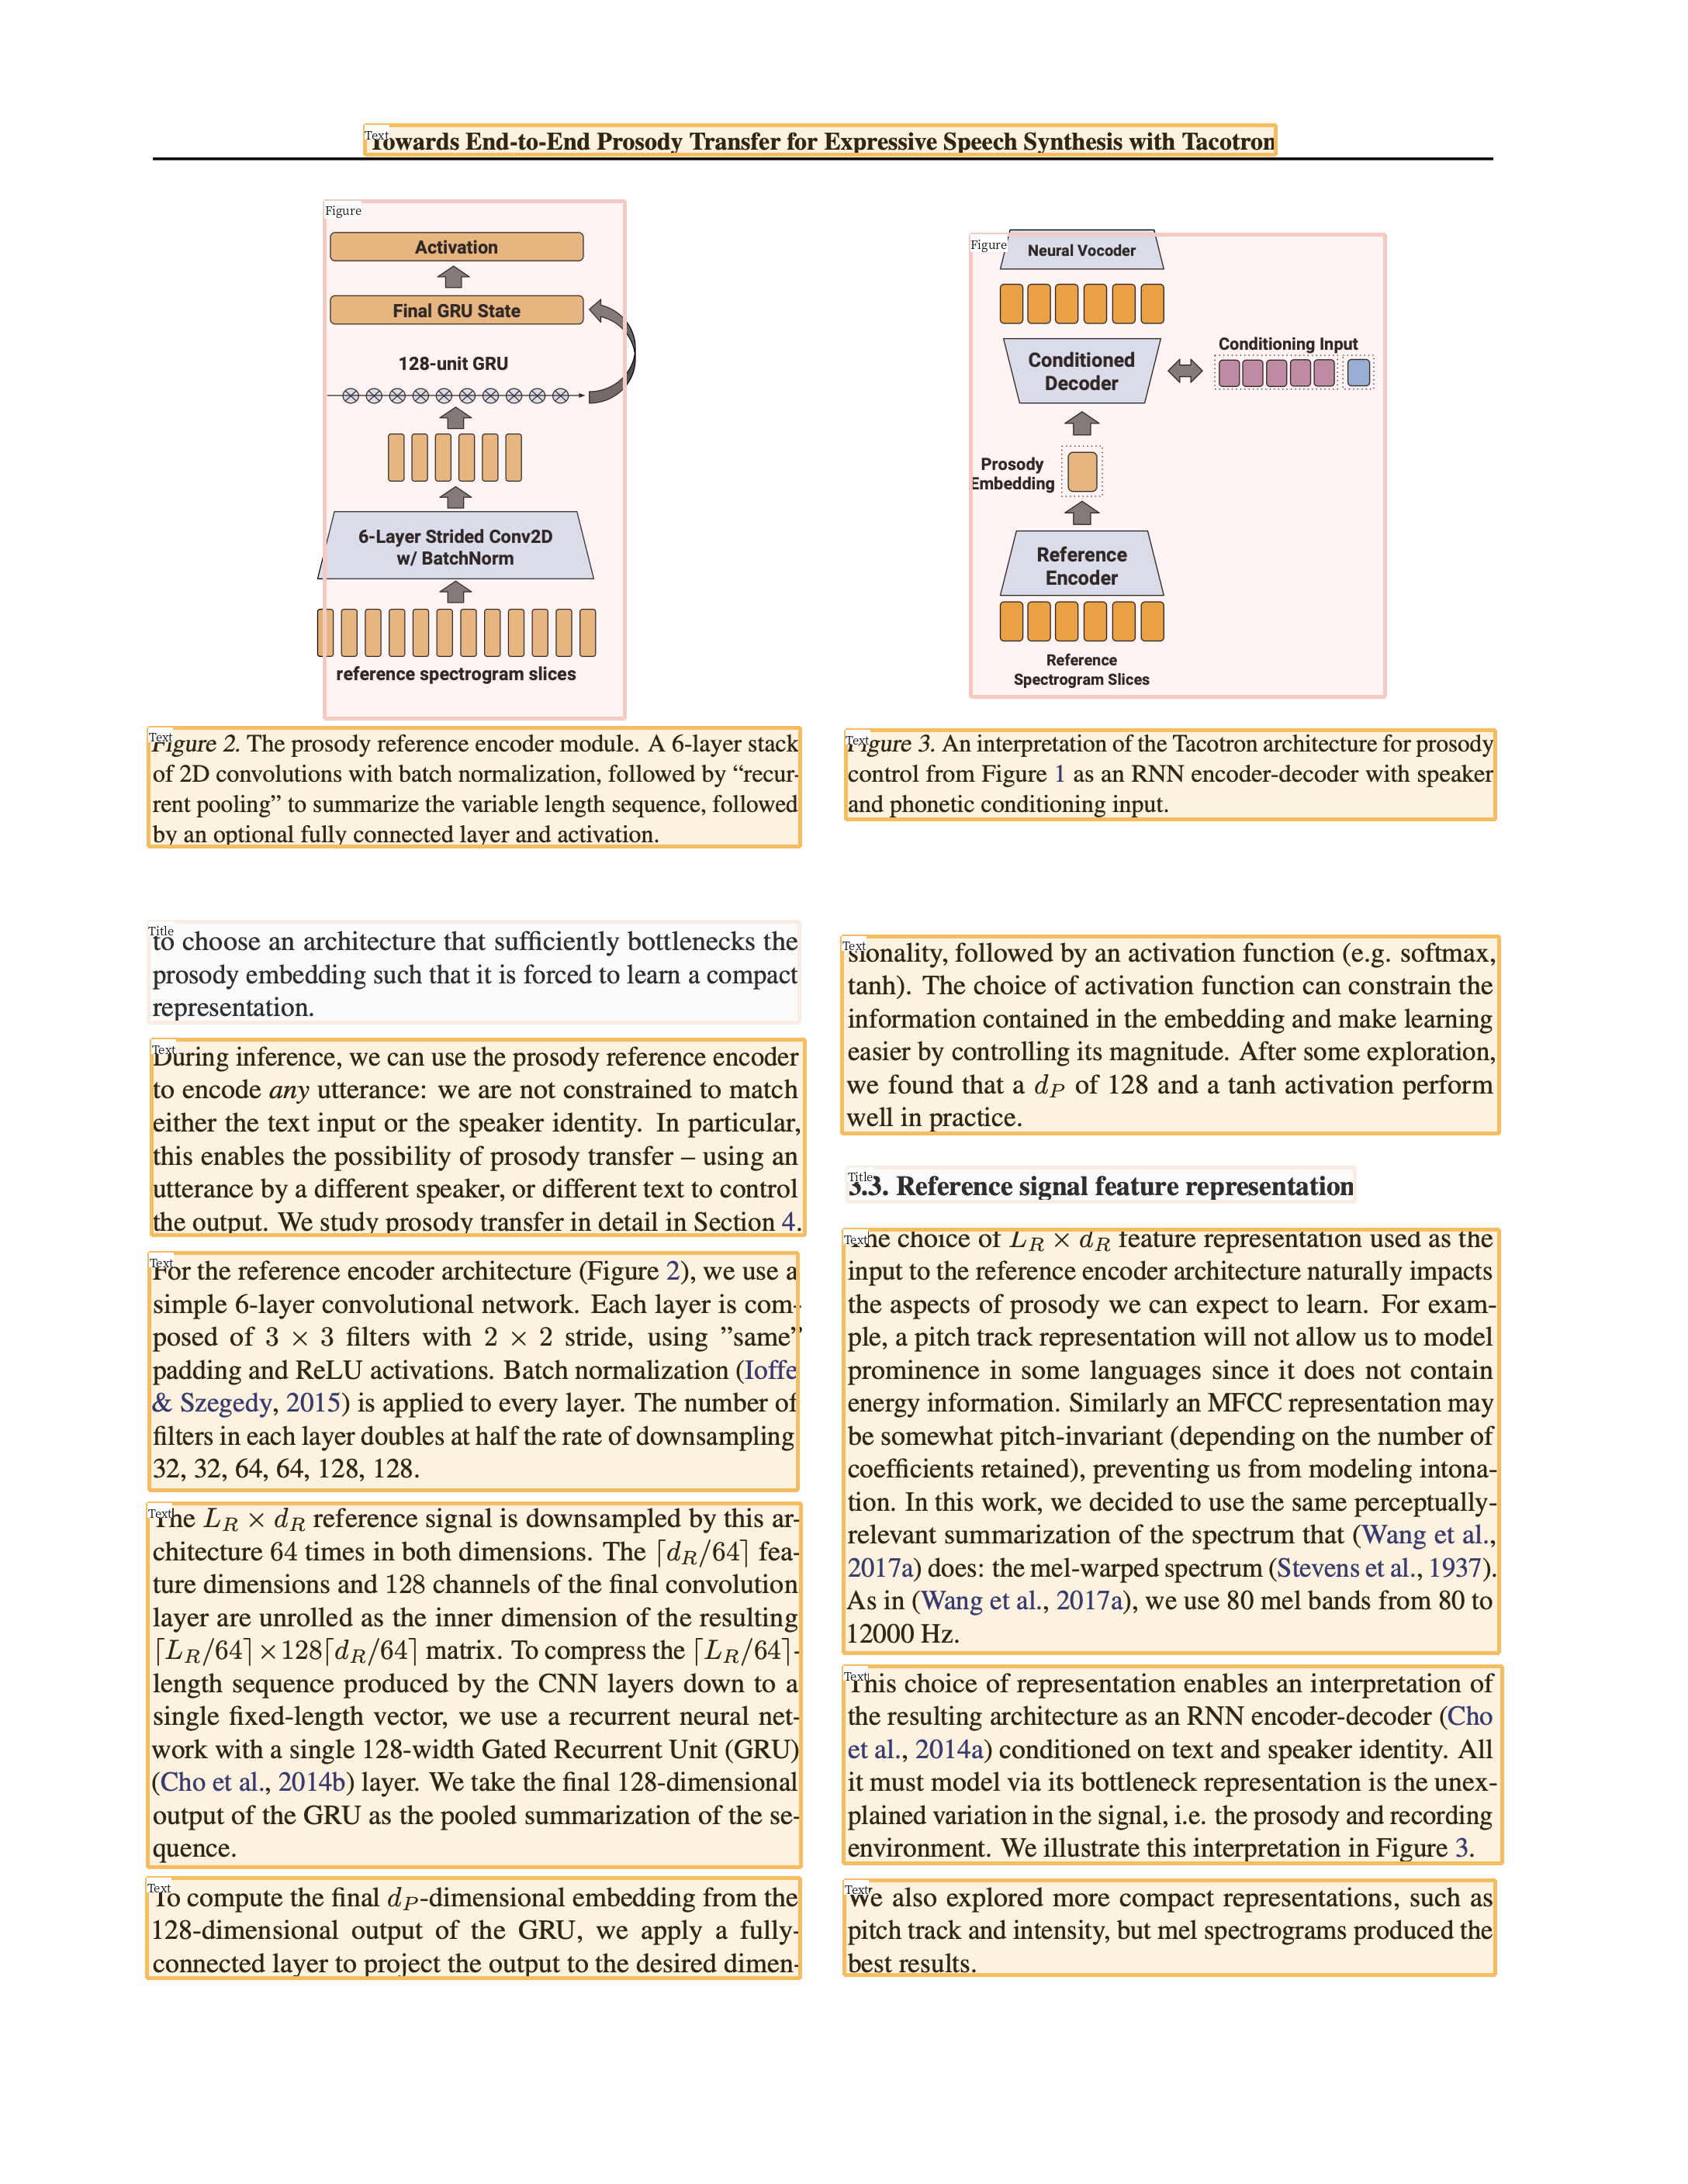

In [ ]:
lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)


It's not perfect but it's really nice don't you think?

It even recognises figures and titles, especially the second is non-trivial (and it fact there is an error).

Now what if we want to retain only the text regions?

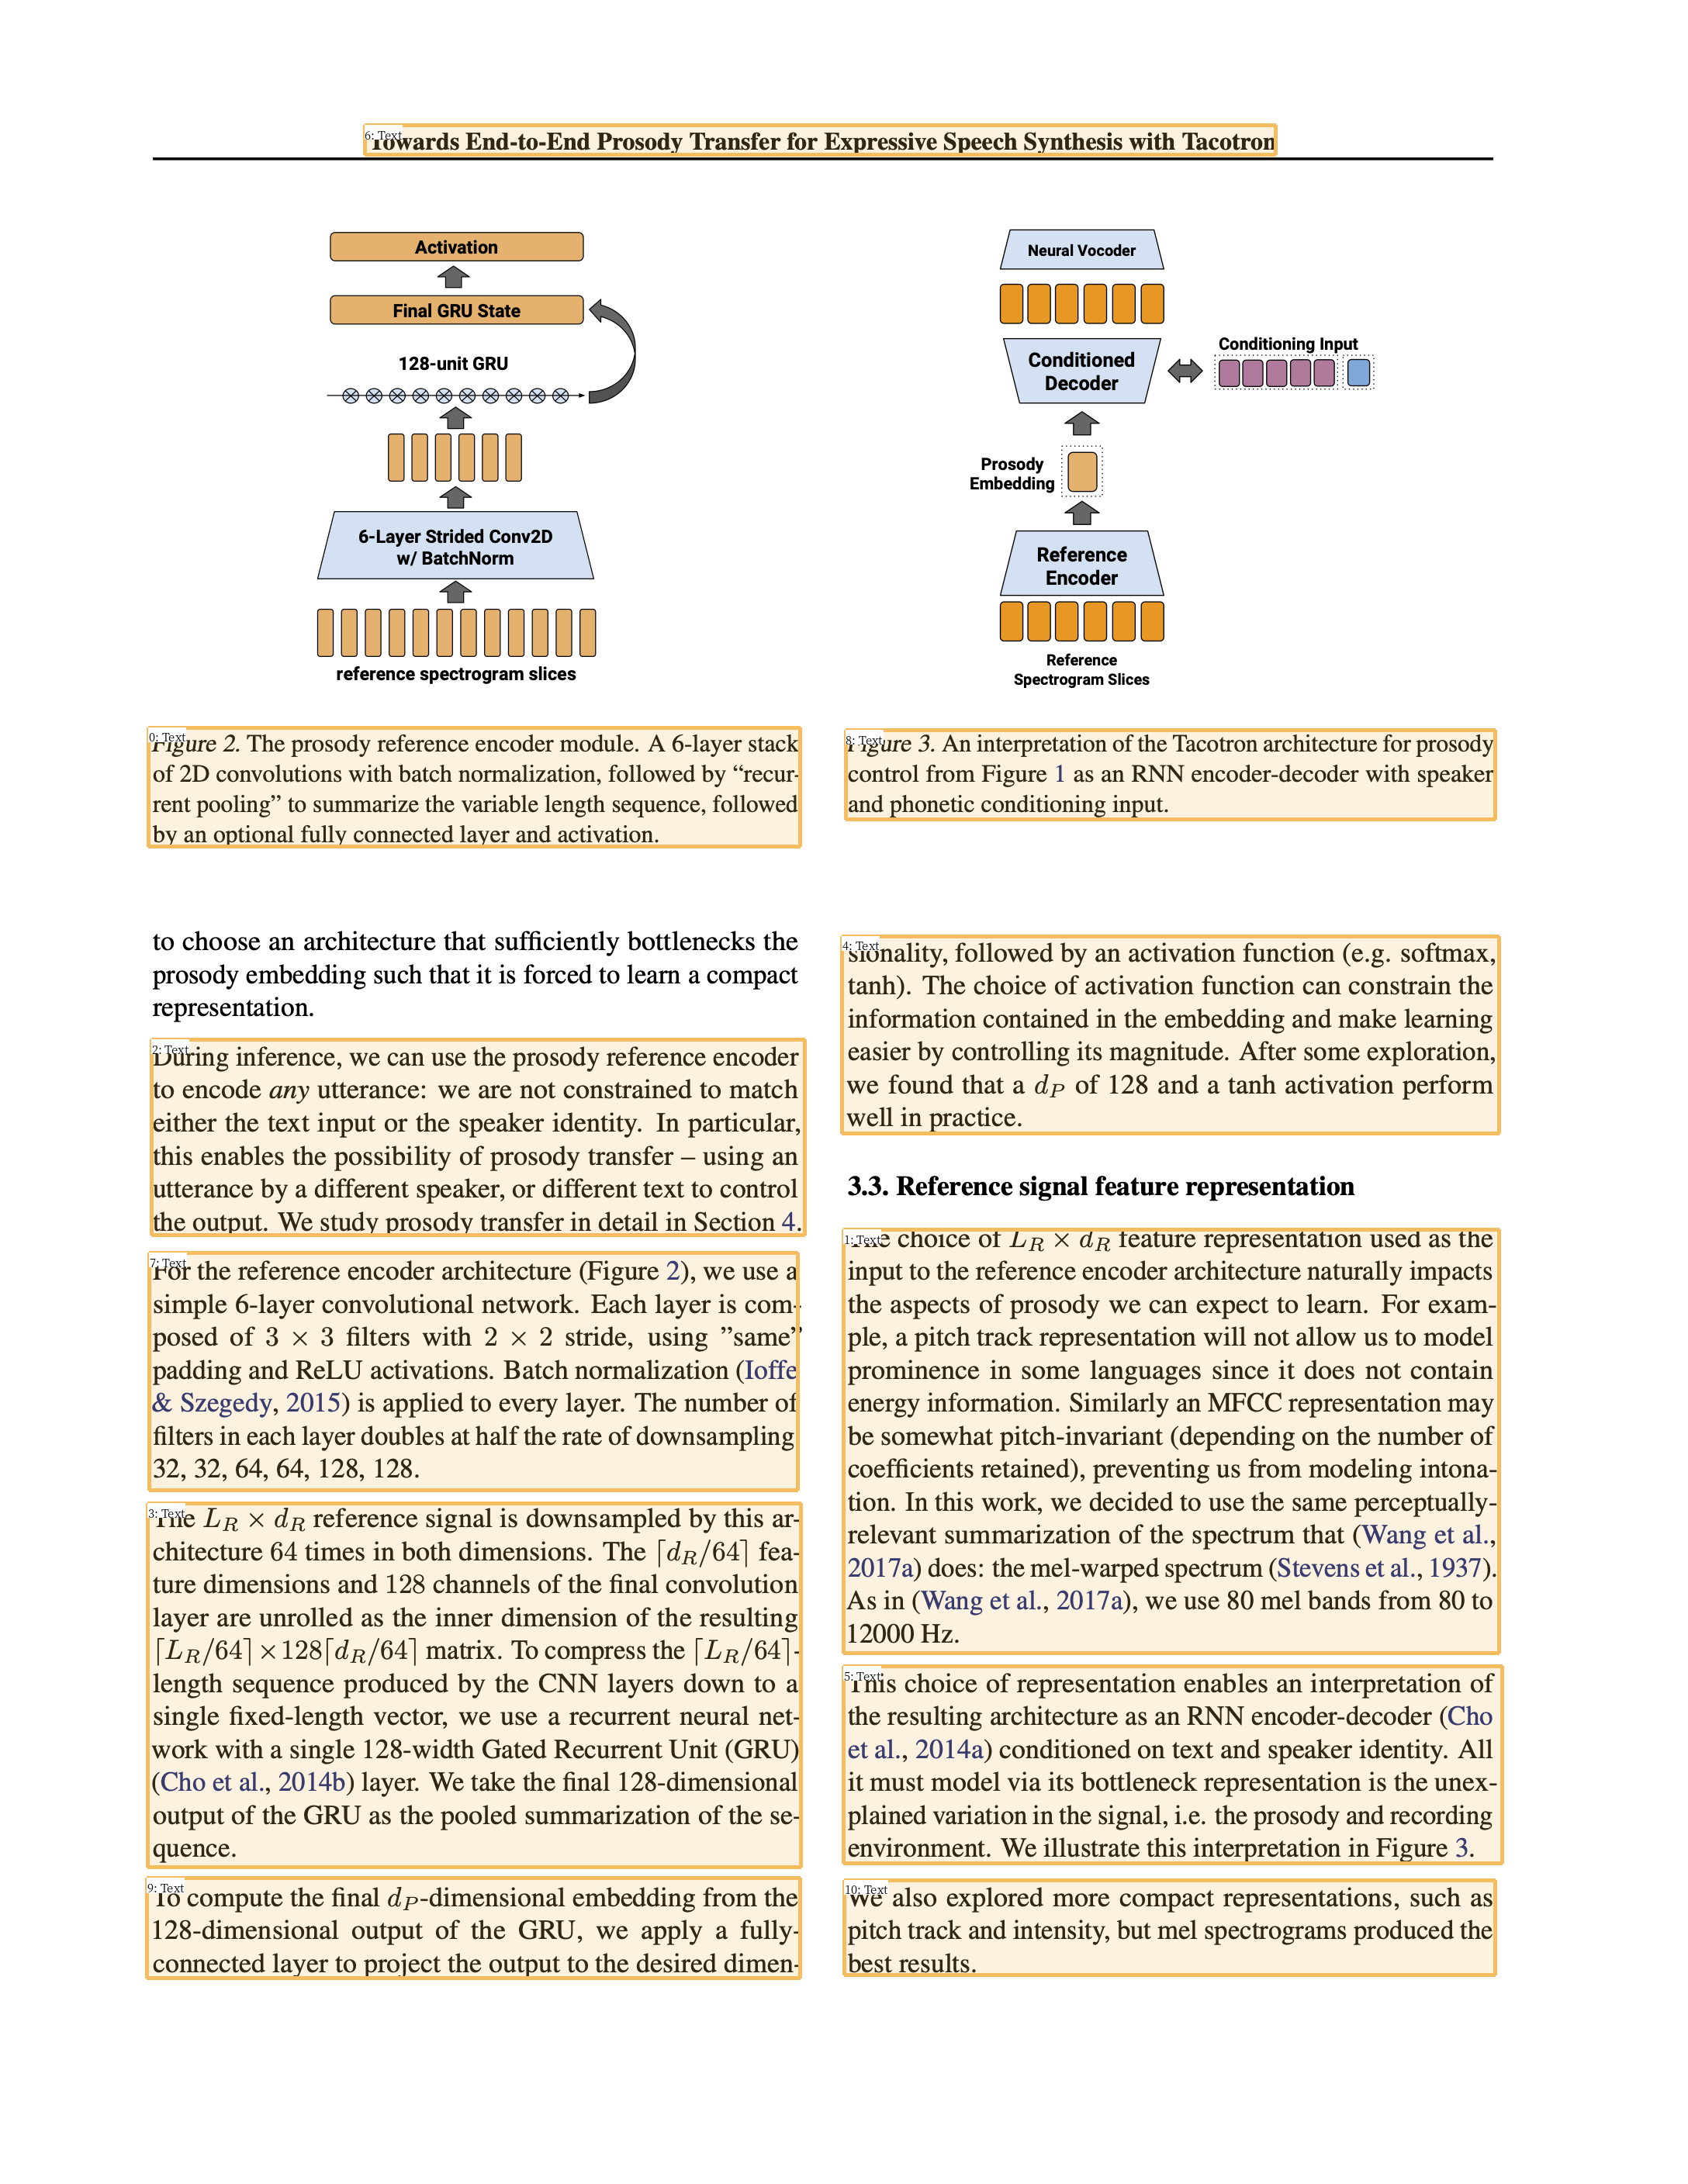

In [ ]:
text_blocks = lp.Layout([b for b in layout_result if b.type=='Text'])
lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

Now we can use the OCR tool to extract the identified text. We need just a bit of preprocessing to retain the blocks in order.

In [ ]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/2, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

Now we create an instance of the OCR agent and run it on the text blocks

In [ ]:
!pip3 install pytesseract

In [ ]:
import layoutparser.ocr as ocr

ocr_agent = ocr.TesseractAgent(languages='eng')

In [ ]:
for block in text_blocks:

    # Crop image around the detected layout
    segment_image = (block.pad(left=15, right=15, top=5, bottom=5).crop_image(img))

    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

Finally we ca read the text we extracted from our blocks:

In [ ]:
for txt in text_blocks:
    print(txt.text, end='\n\n')

Towards End-to-End Prosody Transfer for Expressive Speech Synthesis with Tacotron

 


Figure 2. The prosody reference encoder module. A 6-layer stack
of 2D convolutions with batch normalization, followed by “recur-
rent pooling” to summarize the variable length sequence, followed
by an optional fully connected layer and activation.


During inference, we can use the prosody reference encoder
to encode any utterance: we are not constrained to match
either the text input or the speaker identity. In particular,
this enables the possibility of prosody transfer — using an
utterance by a different speaker, or different text to control
the output. We study prosody transfer in detail in Section 4.


For the reference encoder architecture (Figure 2), we use a
simple 6-layer convolutional network. Each layer is com-
posed of 3 x 3 filters with 2 x 2 stride, using ”same”
padding and ReLU activations. Batch normalization (Ioffe
& Szegedy, 2015) is applied to every layer. The number of
filters 

Now that we have a string we can have fun using all the RegEx we want to extract information.